# Use Package

In [31]:
using CSV
using DataFrames
using PyPlot
using Metrics
using Random

In [32]:
using ScikitLearn, Random, Statistics
using MLJ
using DecisionTree

# Import Data

In [33]:
imported_df = CSV.read("Data\\CO2 Emissions_Canada.csv", DataFrame)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders
,String15,String,String31,Float64,Int64
1,ACURA,ILX,COMPACT,2.0,4
2,ACURA,ILX,COMPACT,2.4,4
3,ACURA,ILX HYBRID,COMPACT,1.5,4
4,ACURA,MDX 4WD,SUV - SMALL,3.5,6
5,ACURA,RDX AWD,SUV - SMALL,3.5,6
6,ACURA,RLX,MID-SIZE,3.5,6
7,ACURA,TL,MID-SIZE,3.5,6
8,ACURA,TL AWD,MID-SIZE,3.7,6
9,ACURA,TL AWD,MID-SIZE,3.7,6


# Data Cleaning

In [47]:
main_df = dropmissing(imported_df)
main_df = main_df[:,Not(["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"])]

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km)
,Float64,Int64,Float64,Float64
1,2.0,4,9.9,6.7
2,2.4,4,11.2,7.7
3,1.5,4,6.0,5.8
4,3.5,6,12.7,9.1
5,3.5,6,12.1,8.7
6,3.5,6,11.9,7.7
7,3.5,6,11.8,8.1
8,3.7,6,12.8,9.0
9,3.7,6,13.4,9.5


# Train-Test

In [48]:
function train_test_split(X, y, test_size)
    n = nrow(X)
    indices = shuffle(1:n)
    split_idx = Int(ceil((1 - test_size) * n))

    X_train = X[indices[1:split_idx], :]
    y_train = y[indices[1:split_idx]]

    X_test = X[indices[split_idx+1:end], :]
    y_test = y[indices[split_idx+1:end]]

    return X_train, X_test, y_train, y_test
end
test_size = 0.2
data_x = main_df[:,Not(["CO2 Emissions(g/km)"])]
data_y = main_df[:,     "CO2 Emissions(g/km)"]
X_train, X_test, y_train, y_test = train_test_split(data_x,    data_y,    test_size)

(5908×6 DataFrame. Omitted printing of 3 columns
│ Row  │ Engine Size(L) │ Cylinders │ Fuel Consumption City (L/100 km) │
│      │ Float64        │ Int64     │ Float64                          │
├──────┼────────────────┼───────────┼──────────────────────────────────┤
│ 1    │ 3.4            │ 6         │ 12.9                             │
│ 2    │ 3.5            │ 6         │ 13.7                             │
│ 3    │ 2.0            │ 4         │ 10.9                             │
│ 4    │ 2.0            │ 4         │ 11.2                             │
│ 5    │ 3.6            │ 6         │ 12.3                             │
│ 6    │ 3.7            │ 6         │ 13.6                             │
│ 7    │ 3.0            │ 6         │ 12.7                             │
│ 8    │ 2.5            │ 4         │ 11.9                             │
│ 9    │ 2.0            │ 4         │ 11.3                             │
│ 10   │ 5.0            │ 8         │ 16.1                             │
⋮


# Modeling

In [79]:
# Create model
lr = ScikitLearn.Models.LinearRegression(multi_output=false)

# Train the model
ScikitLearn.fit!(lr, Matrix(X_train),  y_train)

ScikitLearn.Models.LinearRegression{Matrix{Float64}, Float64}([4.749518757245536; 7.694059733153104; … ; -0.37289445443509833; -3.48877714518704;;], [230.35850622151915])

In [80]:
# Prediction
y_pred_test = vec(ScikitLearn.predict(lr, Matrix(X_test)))

1477-element Vector{Float64}:
 268.0005910506567
 244.84985595418516
 271.5033247132802
 261.19555854156
 202.35746040688525
 201.27136461039754
 193.53886501278896
 252.8400712526852
 323.4887195285014
 189.95174905637032
 306.79862371991555
 382.4470838569082
 292.6636619842321
   ⋮
 239.81469952597163
 345.3904612952337
 310.45976371406124
 225.77653849288762
 202.05855025104248
 282.3364013937388
 221.54284514453676
 179.77160823120767
 264.7515732962203
 337.3285478196053
 183.4463722660836
 297.0590908929022

In [81]:
df  = DataFrame(Predict = y_pred_test)
df2 = DataFrame(Actual = y_test)
df_export = hcat(df, df2)
CSV.write("CO2_Emission_Prediction2.csv", df_export) 

"CO2_Emission_Prediction2.csv"

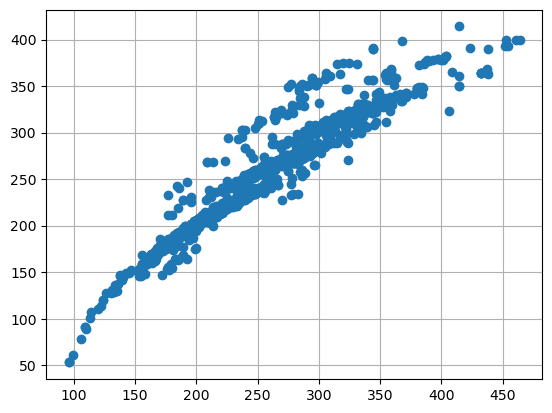

In [82]:
using PyPlot
plot(y_test, y_pred_test, "o")
grid()

# Modeling

In [83]:
# Create model
DT = DecisionTreeClassifier(max_depth=100)

# Train the model
ScikitLearn.fit!(DT, Matrix(X_train),  y_train)

DecisionTreeClassifier
max_depth:                100
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [96, 102, 103, 104, 105, 106, 108, 110, 111, 113  …  464, 465, 467, 473, 476, 485, 487, 488, 493, 522]
root:                     Decision Tree
Leaves: 2576
Depth:  18

In [84]:
# Prediction
y_pred_test = vec(ScikitLearn.predict(DT, Matrix(X_test)))

1477-element Vector{Int64}:
 272
 230
 277
 258
 200
 193
 189
 283
 331
 184
 334
 396
 283
   ⋮
 221
 382
 308
 225
 214
 290
 229
 179
 259
 285
 177
 290

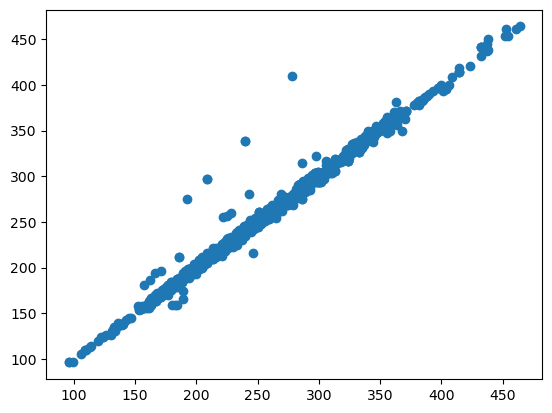

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000020FFD3B3CD0>

In [85]:
using PyPlot
plot(y_test, y_pred_test, "o")

In [86]:
df  = DataFrame(Predict = y_pred_test)
df2 = DataFrame(Actual = y_test)
df_export = hcat(df, df2)
CSV.write("CO2_Emission_Prediction1.csv", df_export) 

"CO2_Emission_Prediction1.csv"